# Fawry Merchants Segmentation - Loyalty

## By: Salem Mohamed -  Master of Business Analystics @ USM 

In [1]:
%matplotlib inline

## Import Lib.

In [6]:
#import the necessary libraries

import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import pairwise_distances,silhouette_score,calinski_harabasz_score,davies_bouldin_score
from collections import Counter

## Importing Data

In [7]:
#import the data from the provided excel file

raw_dff = pd.read_excel("Copy.xlsx", sheet_name="Sales Data")

In [8]:
#create a copy of the dataframe instead of importing data everytime to restore zero point

raw_df = raw_dff.copy()
raw_df

,ACCOUNT_CODE,MONTH_CD,SERVICE_CATEGORY,TRX_CNT,TRX_AMT,WORKING_DAYS,BIG_VALUE_TICKETS,AVG_TRX_AMT,BTC_COUNT,BILLERS_COUNT,QUARTER,YEAR
0,814,202001,Acquiring,55,37969.14,24,0,1518.7656,1,1,20201,2020
1,814,202001,B2B,111,261195.00,29,2,7255.4167,2,2,20201,2020
2,814,202001,Cash In,51,53328.00,22,2,2051.0769,2,2,20201,2020
3,814,202001,Cash Out,14,38360.00,10,2,3836.0000,1,1,20201,2020
4,814,202001,Charity,2,500.00,1,0,250.0000,2,2,20201,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
184212,101,202210,Education,4,1140.00,2,0,570.0000,1,1,20224,2022
184213,101,202210,Financial Collection Services,25,12852.34,5,0,2142.0567,1,1,20224,2022
184214,101,202210,Top-Up,6,321.75,2,0,107.2500,1,1,20224,2022
184215,101,202210,Utilities,5,1130.50,3,0,376.8333,1,1,20224,2022


## Exploratory Data Analysis

### Statistics

In [9]:
#checking for null values in each column 
raw_df.isnull().sum()

ACCOUNT_CODE         0
MONTH_CD             0
SERVICE_CATEGORY     0
TRX_CNT              0
TRX_AMT              0
WORKING_DAYS         0
BIG_VALUE_TICKETS    0
AVG_TRX_AMT          0
BTC_COUNT            0
BILLERS_COUNT        0
QUARTER              0
YEAR                 0
dtype: int64

In [10]:
#getting information and description about the dataframe and columns inside

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184217 entries, 0 to 184216
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ACCOUNT_CODE       184217 non-null  int64  
 1   MONTH_CD           184217 non-null  int64  
 2   SERVICE_CATEGORY   184217 non-null  object 
 3   TRX_CNT            184217 non-null  int64  
 4   TRX_AMT            184217 non-null  float64
 5   WORKING_DAYS       184217 non-null  int64  
 6   BIG_VALUE_TICKETS  184217 non-null  int64  
 7   AVG_TRX_AMT        184217 non-null  float64
 8   BTC_COUNT          184217 non-null  int64  
 9   BILLERS_COUNT      184217 non-null  int64  
 10  QUARTER            184217 non-null  int64  
 11  YEAR               184217 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 16.9+ MB


In [11]:
#showing statistical description for the numerical fields

raw_df.iloc[:,2:9].describe()

,TRX_CNT,TRX_AMT,WORKING_DAYS,BIG_VALUE_TICKETS,AVG_TRX_AMT,BTC_COUNT
count,184217.000000,1.842170e+05,184217.000000,184217.000000,184217.000000,184217.000000
mean,131.829793,9.495894e+03,11.616490,0.160436,657.478937,3.658126
std,389.985997,4.178228e+04,10.033458,2.256127,2766.949881,3.170485
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,4.000000,8.795000e+02,2.000000,0.000000,86.666700,1.000000
50%,17.000000,3.006590e+03,8.000000,0.000000,209.986000,2.000000
75%,83.000000,8.567500e+03,20.000000,0.000000,580.066700,6.000000
max,9806.000000,5.552400e+06,31.000000,195.000000,644510.000000,34.000000


In [12]:
#statistic description of "all" features to view the categorical field, SERVICE_CATEGORY.

raw_df.describe(include = 'all')

,ACCOUNT_CODE,MONTH_CD,SERVICE_CATEGORY,TRX_CNT,TRX_AMT,WORKING_DAYS,BIG_VALUE_TICKETS,AVG_TRX_AMT,BTC_COUNT,BILLERS_COUNT,QUARTER,YEAR
count,184217.000000,184217.000000,184217,184217.000000,1.842170e+05,184217.000000,184217.000000,184217.000000,184217.000000,184217.000000,184217.000000,184217.000000
unique,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Top-Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,623.065765,202118.399073,NaN,131.829793,9.495894e+03,11.616490,0.160436,657.478937,3.658126,2.726258,20213.671594,2021.120157
std,247.198749,79.136662,NaN,389.985997,4.178228e+04,10.033458,2.256127,2766.949881,3.170485,1.877036,7.869493,0.796154
min,1.000000,202001.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,20201.000000,2020.000000
25%,476.000000,202012.000000,NaN,4.000000,8.795000e+02,2.000000,0.000000,86.666700,1.000000,1.000000,20204.000000,2020.000000
50%,648.000000,202109.000000,NaN,17.000000,3.006590e+03,8.000000,0.000000,209.986000,2.000000,2.000000,20213.000000,2021.000000
75%,828.000000,202204.000000,NaN,83.000000,8.567500e+03,20.000000,0.000000,580.066700,6.000000,4.000000,20222.000000,2022.000000


In [13]:
#check for number of duplicates in data

raw_df.duplicated().sum()

0

### Charts

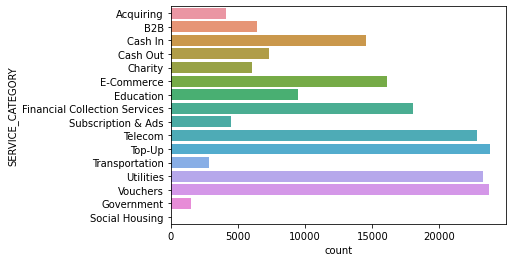

In [14]:
#show a count plot for SERVICE_CATEGORY column
sns.countplot(data = raw_df, y ="SERVICE_CATEGORY")

#save chart as a jpeg
plt.savefig('category_count.jpeg',bbox_inches="tight",pad_inches=0.6)

In [15]:
#print the frequency of each value of SERVICE_CATEGORY

raw_df["SERVICE_CATEGORY"].value_counts()

Top-Up                           23752
Vouchers                         23674
Utilities                        23247
Telecom                          22812
Financial Collection Services    18035
E-Commerce                       16059
Cash In                          14536
Education                         9445
Cash Out                          7291
B2B                               6432
Charity                           6023
Subscription & Ads                4454
Acquiring                         4077
Transportation                    2855
Government                        1513
Social Housing                      12
Name: SERVICE_CATEGORY, dtype: int64

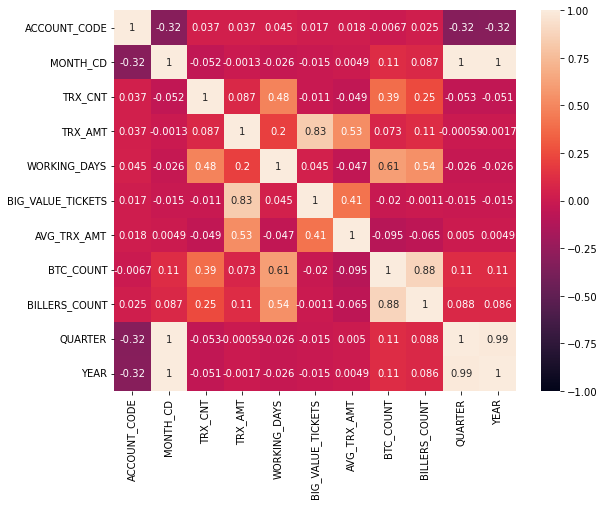

In [16]:
#set the dimension of the chart
fig, ax = plt.subplots(figsize=(9, 7))
 
# drawing the heatmap plot
sns.heatmap(raw_df.corr(), vmin=-1,vmax=1, annot=True,ax=ax)
plt.savefig('heatmap.jpeg',bbox_inches="tight",pad_inches=0.6)
plt.show()

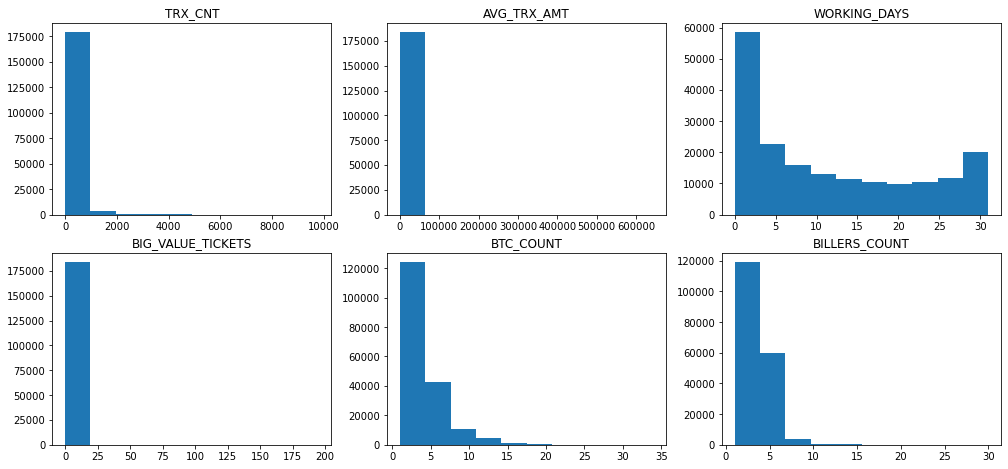

In [17]:
#set the dimension of the chart
fig, ax = plt.subplots(figsize=(17, 12))

#set the subplot, then draw the histogram for numerical fields
plt.subplot(3, 3, 1)
plt.hist(raw_df["TRX_CNT"])
plt.title("TRX_CNT")

plt.subplot(3, 3, 2)
plt.hist(raw_df["AVG_TRX_AMT"])
plt.title("AVG_TRX_AMT")

plt.subplot(3, 3, 3)
plt.hist(raw_df["WORKING_DAYS"])
plt.title("WORKING_DAYS")

plt.subplot(3, 3, 4)
plt.hist(raw_df["BIG_VALUE_TICKETS"])
plt.title("BIG_VALUE_TICKETS")

plt.subplot(3, 3, 5)
plt.hist(raw_df["BTC_COUNT"])
plt.title("BTC_COUNT")

plt.subplot(3, 3, 6)
plt.hist(raw_df["BILLERS_COUNT"],)
plt.title("BILLERS_COUNT")



fig.savefig('col_subplots.jpeg')
plt.show()

## Data Preprocessing

### Data Transformation

In [14]:
#update MONTH_CD with a datetime datatype
raw_df['MONTH_CD'] = pd.to_datetime(raw_df['MONTH_CD'], format='%Y%m')

#creating new column for quarters
qs = raw_df["MONTH_CD"]
raw_df['Quarter_timestamp'] = pd.PeriodIndex(qs, freq='Q')

#view the dataframe information to cindirm the datatypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184217 entries, 0 to 184216
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ACCOUNT_CODE       184217 non-null  int64         
 1   MONTH_CD           184217 non-null  datetime64[ns]
 2   SERVICE_CATEGORY   184217 non-null  object        
 3   TRX_CNT            184217 non-null  int64         
 4   TRX_AMT            184217 non-null  float64       
 5   WORKING_DAYS       184217 non-null  int64         
 6   BIG_VALUE_TICKETS  184217 non-null  int64         
 7   AVG_TRX_AMT        184217 non-null  float64       
 8   BTC_COUNT          184217 non-null  int64         
 9   BILLERS_COUNT      184217 non-null  int64         
 10  QUARTER            184217 non-null  int64         
 11  YEAR               184217 non-null  int64         
 12  Quarter_timestamp  184217 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64(2), int64(8), 

### Data Filtering

In [15]:
#filter data by only the 3rd quarter of 2022 
raw_df = raw_df[raw_df["Quarter_timestamp"]=="2022Q3"]

### Feature Engineering

In [16]:
#create the Frequency feature as the average no. of transactions per day (3 months)
acc_freq = raw_df.groupby(["ACCOUNT_CODE"])["TRX_CNT"].sum().div(90).round(2)
acc_freq

ACCOUNT_CODE
1       18.29
2       25.86
3       45.91
4        2.43
5       12.03
        ...  
996      8.49
997      7.16
998     14.88
999     16.31
1000    25.54
Name: TRX_CNT, Length: 998, dtype: float64

In [17]:
#create the Monetary feature as the average no. of transactions per day (3 months)
acc_mon = raw_df.groupby(["ACCOUNT_CODE"])["TRX_AMT"].sum().div(90).round(2)
acc_mon

ACCOUNT_CODE
1        416.93
2        972.65
3       3613.67
4        631.43
5        603.51
         ...   
996      602.65
997      314.23
998      521.90
999     1202.70
1000     885.66
Name: TRX_AMT, Length: 998, dtype: float64

In [18]:
#group merchants and choose the most recent transaction date for each
df_recency = raw_df.groupby(by='ACCOUNT_CODE',as_index=False)['MONTH_CD'].max()

#label the columns
df_recency.columns = ['Merchant_Code', 'LastPurchaseDate']

#find the most recent date in the dataframe and create a recency column by calculatin the diffrence
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
acc_rec = df_recency.groupby("Merchant_Code")["Recency"].sum()
acc_rec

Merchant_Code
1       0
2       0
3       0
4       0
5       0
       ..
996     0
997     0
998     0
999     0
1000    0
Name: Recency, Length: 998, dtype: int64

In [19]:
#order the 3 features in a single dataframe with Merchant_Code as index
rfm = pd.DataFrame({"Recency":acc_rec,"Frequency":acc_freq,"Monetary":acc_mon}, 
                   index = acc_rec.index)
rfm

,Recency,Frequency,Monetary
Merchant_Code,,,
1,0,18.29,416.93
2,0,25.86,972.65
3,0,45.91,3613.67
4,0,2.43,631.43
5,0,12.03,603.51
...,...,...,...
996,0,8.49,602.65
997,0,7.16,314.23
998,0,14.88,521.90


In [20]:
#print the variance for each feature (column)
rfm.var()

Recency      3.881547e+01
Frequency    1.015547e+03
Monetary     8.521020e+06
dtype: float64

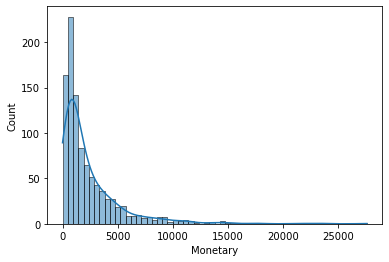

In [21]:
#draw histogram for Monetary and save the chart as jpeg
sns.histplot(rfm["Monetary"],kde=True)
plt.savefig('monetary_hist.jpeg',bbox_inches="tight",pad_inches=0.6)

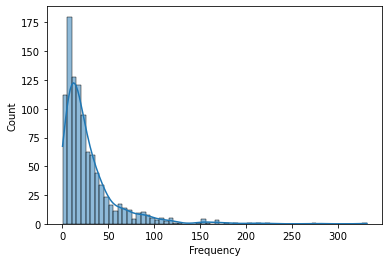

In [22]:
#draw histogram for Frequency and save the chart as jpeg
sns.histplot(rfm["Frequency"],kde=True)
plt.savefig('frequency_hist.jpeg',bbox_inches="tight",pad_inches=0.6)

In [23]:
#apply log transformation to normalize the data
rfm = rfm[["Frequency","Monetary"]].apply(lambda x: np.log(x+1))

In [24]:
#add the Recency column back to the features after normaliztion
rfm["Recency"] = acc_rec
rfm

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


In [25]:
#examining the variance for the features after normalization
rfm.var()

Frequency     0.872110
Monetary      1.299304
Recency      38.815473
dtype: float64

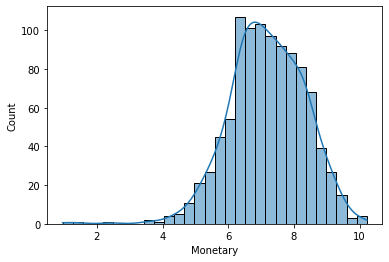

In [26]:
#draw histogram for Monetary after normalization and save the chart as jpeg
sns.histplot(rfm["Monetary"],kde=True)
plt.savefig('log_monetary_hist.jpeg',bbox_inches="tight",pad_inches=0.6)

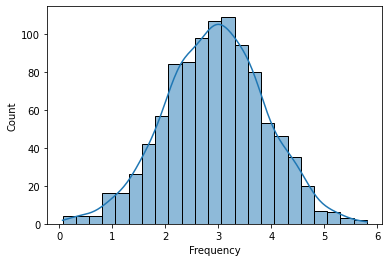

In [27]:
#draw histogram for Frequency after normalization and save the chart as jpeg
sns.histplot(rfm["Frequency"],kde=True)
plt.savefig('log_frequency_hist.jpeg',bbox_inches="tight",pad_inches=0.6)

In [28]:
rfm

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


## Methodology

### PHASE1

### K-Means

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

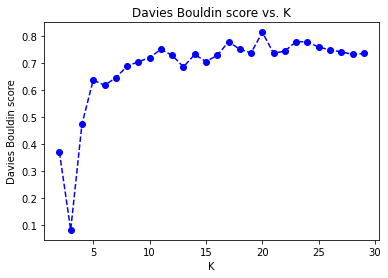

In [29]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(rfm)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(rfm, model)
    
    return score
#create a list to store scores and loop through values from 2 to 29
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(rfm, center))

#plot scores against centers values
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K')

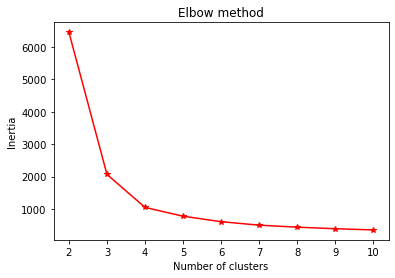

In [30]:
#create lists for each metric used
inertias = []
silhouette_avg = []
ch_score_kmeans = []

#loop through values of k, eachtime training the model with a new k and append the metrics scores
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(rfm, cluster_labels))
    ch_score_kmeans.append(metrics.calinski_harabasz_score(rfm, kmeans.labels_))

#plot the inertia against the numbers of k
plt.plot(range(2,11), inertias, marker='*',c="r")
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

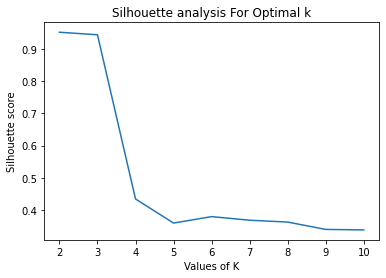

In [31]:
#plot the silhouette score against the numbers of k
plt.plot(range(2,11),silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

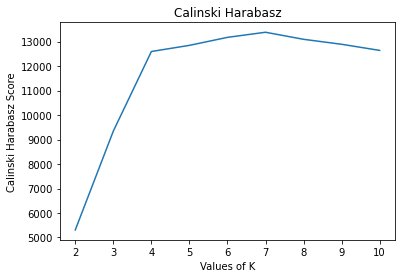

In [32]:
#plot the Calinski Harabasz Score against the numbers of k
plt.plot(range(2,11),ch_score_kmeans)
plt.xlabel("Values of K") 
plt.ylabel('Calinski Harabasz Score') 
plt.title('Calinski Harabasz')
plt.show()

In [33]:
#train the nodel with the chosen k=3
modell = KMeans(n_clusters=3,init= "k-means++", random_state=40)
m = modell.fit_predict(rfm)

In [34]:
#create a list for the metrics scores for the model
k1 = [silhouette_score(rfm, modell.labels_, metric='euclidean'),
      metrics.calinski_harabasz_score(rfm, modell.labels_),
      davies_bouldin_score(rfm, modell.labels_)]
print("Silhouette score: ",k1[0])
print("Calinski Harabasz Score: ", k1[1])
print("Davies Bouldin Score: ",k1[2])

Silhouette score:  0.9433675430378398
Calinski Harabasz Score:  9346.327105888326
Davies Bouldin Score:  0.08085932131523112


In [35]:
#update the dataframe with Cluster field containing clustering labels
rfm["Cluster"] = modell.labels_
rfm.head()

,Frequency,Monetary,Recency,Cluster
Merchant_Code,,,,
1,2.959587,6.035314,0,0
2,3.290638,6.881052,0,0
3,3.848231,8.192756,0,0
4,1.232560,6.449570,0,0
5,2.567254,6.404418,0,0


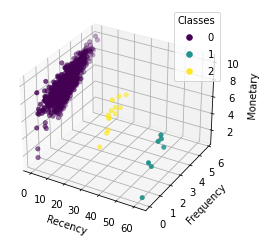

In [36]:
#3d plot the data and colored by the cluster label
fig = plt.figure()
ax = plt.axes(projection='3d')
scatt = ax.scatter(rfm["Recency"],rfm["Frequency"], rfm["Monetary"], c=modell.labels_ , 
                   cmap='viridis', linewidth=0.5, label = [0,1,2,3])
ax.legend(*scatt.legend_elements(),loc="best", title="Classes")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

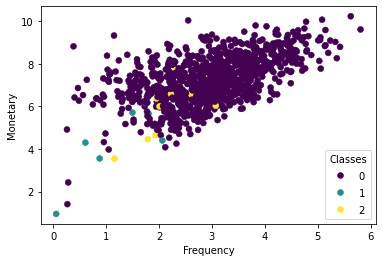

In [37]:
#2d plot the data and colored by the cluster label

plt.scatter(rfm["Frequency"], rfm["Monetary"], c=modell.labels_ , cmap='viridis', 
            linewidth=0.5, label = [0,1,2,3] )
plt.legend(*scatt.legend_elements(),loc="lower right", title="Classes")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

In [38]:
#print the distribution of clusters
rfm.Cluster.value_counts()

0    978
2     13
1      7
Name: Cluster, dtype: int64

In [39]:
rfm

,Frequency,Monetary,Recency,Cluster
Merchant_Code,,,,
1,2.959587,6.035314,0,0
2,3.290638,6.881052,0,0
3,3.848231,8.192756,0,0
4,1.232560,6.449570,0,0
5,2.567254,6.404418,0,0
...,...,...,...,...
996,2.250239,6.402995,0,0
997,2.099244,5.753303,0,0
998,2.765060,6.259390,0,0


In [40]:
rfm = rfm.drop("Cluster", axis=1)
rfm

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


### Gaussian Mixture Model (GMM)

In [41]:
rfm

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


In [42]:
#create instance of the model and fit the model on the data 

gmm_model = GaussianMixture(n_components=3, random_state=40)
cluster_labels = gmm_model.fit_predict(rfm)


In [43]:
#create a list for the metrics scores for the model
gmm1 = [silhouette_score(rfm, cluster_labels),
        metrics.calinski_harabasz_score(rfm, cluster_labels),
        davies_bouldin_score(rfm, cluster_labels)]
print("Silhouette score: ",gmm1[0])
print("Calinski Harabasz Score: ", gmm1[1])
print("Davies Bouldin Score: ",gmm1[2])

Silhouette score:  0.9433675430378398
Calinski Harabasz Score:  9346.327105888326
Davies Bouldin Score:  0.08085932131523112


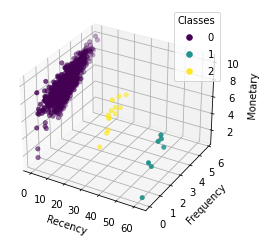

In [44]:
#3d plot the data and colored by the cluster label
fig = plt.figure()
ax = plt.axes(projection='3d')
scatt = ax.scatter(rfm["Recency"],rfm["Frequency"], rfm["Monetary"], 
                   c=cluster_labels , cmap='viridis', linewidth=0.5, label = [0,1,2,3])
ax.legend(*scatt.legend_elements(),loc="best", title="Classes")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

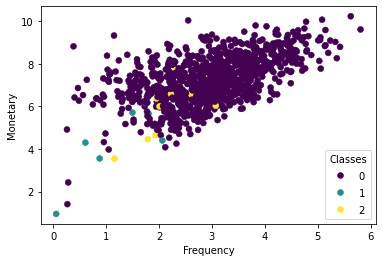

In [45]:
#2d plot the data and colored by the cluster label

plt.scatter(rfm["Frequency"], rfm["Monetary"], c=cluster_labels ,  
            linewidth=0.5, label = [0,1,2,3] )
plt.legend(*scatt.legend_elements(),loc="lower right", title="Classes")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

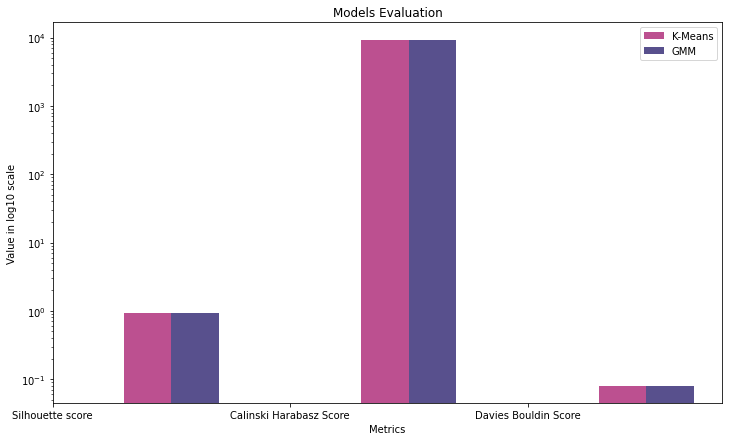

In [46]:
#compare between both models in all metrics
figure(num=None, figsize=(12, 7))

Labels=['Silhouette score', "Calinski Harabasz Score", 'Davies Bouldin Score']
y_pos=np.arange(len(Labels))

plt.bar(y_pos + 0.4,k1 ,width=0.2, color ="#bc5090"  , label='K-Means')
plt.bar(y_pos + 0.6,gmm1 ,width=0.2, color = '#58508d' , label='GMM')

plt.xticks(y_pos, Labels)
plt.yscale('log')
plt.legend(('K-Means', 'GMM'))
plt.ylabel('Value in log10 scale')
plt.xlabel('Metrics')
plt.title("Models Evaluation")
plt.show()

In [47]:
#add the label for each merchant after phase1 clustering
rfm['cluster'] = modell.labels_
rfm.cluster.value_counts()

0    978
2     13
1      7
Name: cluster, dtype: int64

In [48]:
#label encoding the clusters labels
rfm["cluster"] = rfm["cluster"].replace(2,"low risk")
rfm["cluster"] = rfm["cluster"].replace(1,"high risk")

# PHASE2

### data Filtering

In [50]:
#filter data and choose only most recent merchants (cluster 0)
rfm_0 = rfm[rfm["cluster"]==0]
rfm_0 =  rfm_0.drop("cluster",axis=1)
rfm_0

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


### DBSCAN

In [51]:
# NearestNeighbors function requires n_neighbors (number of neighbors) parameter, 
#which can be same as the minPts value. 
nbrs = NearestNeighbors(n_neighbors=4).fit(rfm_0)
# Find the k-neighbors of a point 
neigh_dist, neigh_ind = nbrs.kneighbors(rfm_0)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

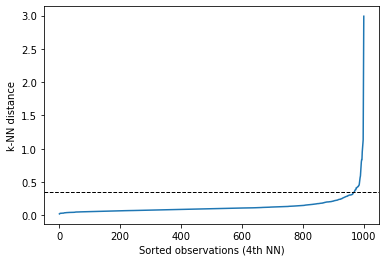

In [52]:
#plot the k-nn distance to find the KNEE for eps parameter
k_dist = sort_neigh_dist[:, 3]
plt.plot(rfm_0.index,k_dist)
plt.axhline(y=0.35, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [53]:
rfm_0

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


In [54]:
#create an instance of the model 
clusters = DBSCAN(eps=0.35, min_samples=4).fit(rfm_0)

#create a list for the metrics scores for the model
db = [silhouette_score(rfm_0, clusters.labels_, metric='euclidean'),
      metrics.calinski_harabasz_score(rfm_0, clusters.labels_),
      davies_bouldin_score(rfm_0, clusters.labels_)]
print("Silhouette score: ",db[0])
print("Calinski Harabasz Score: ",db[1])
print("Davies Bouldin Score: ",db[2])

Silhouette score:  0.5474322090814012
Calinski Harabasz Score:  5.386739401235773
Davies Bouldin Score:  5.386193977418863


In [55]:
#print the frequency of clusters
Counter(clusters.labels_)

Counter({0: 964, -1: 14})

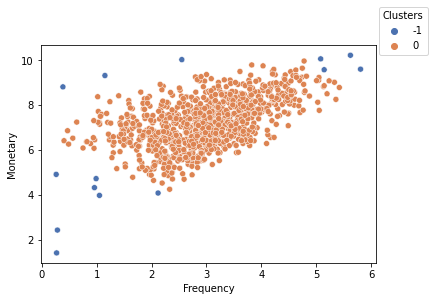

In [56]:
#plot the clusters
p = sns.scatterplot(data=rfm_0, x="Frequency", y="Monetary", 
                    hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### K-Means

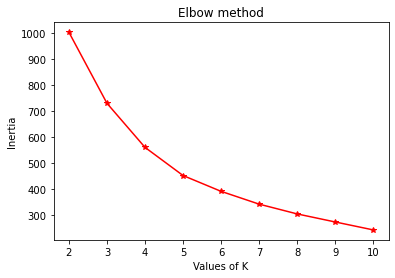

In [57]:
#creating lists for the values needed
inertias_0 = []
silhouette_avg_0 = []
davies_score = []

#loop for k values and append metrics values to lists
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_0)
    inertias_0.append(kmeans.inertia_)
    cluster_labels_0 = kmeans.labels_
    silhouette_avg_0.append(silhouette_score(rfm_0, cluster_labels_0))
    davies_score.append(davies_bouldin_score(rfm_0, cluster_labels_0))
    
#plot the inertia for k values
plt.plot(range(2,11), inertias_0, marker='*',c="r")
plt.title('Elbow method')
plt.xlabel("Values of K") 
plt.ylabel('Inertia')
plt.show()

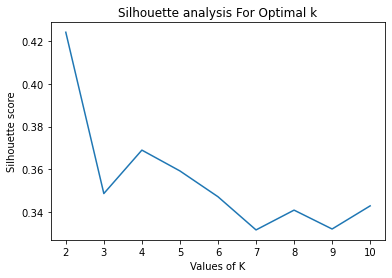

In [58]:
#plot the silhouette score for k values
plt.plot(range(2,11),silhouette_avg_0)
plt.xlabel("Values of K") 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [59]:
#create an instance of kmeans model and train it
modell_0 = KMeans(n_clusters=4,init= "k-means++", random_state=40)
m_0 = modell_0.fit_predict(rfm_0)

#create a list for the metrics scores for the model
k = [silhouette_score(rfm_0, modell_0.labels_, metric='euclidean'),
     metrics.calinski_harabasz_score(rfm_0, modell_0.labels_),
     davies_bouldin_score(rfm_0, modell_0.labels_)]
print("Silhouette score: ",k[0])
print("Calinski Harabasz Score: ", k[1])
print("Davies Bouldin Score: ",k[2])

Silhouette score:  0.36897657536215855
Calinski Harabasz Score:  844.4894736259121
Davies Bouldin Score:  0.8842259662337941


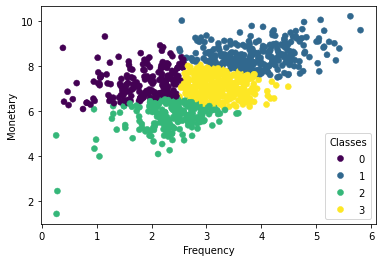

In [60]:
#plot the clusters and color by the labels
fig = plt.figure()
ax = plt.axes()
scatt = ax.scatter(rfm_0["Frequency"], rfm_0["Monetary"], c=modell_0.labels_ , 
                   cmap='viridis', linewidth=0.5, label = [0,1,2,3])
ax.legend(*scatt.legend_elements(),loc="lower right", title="Classes")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

In [61]:
#drop the added label field for the next model
rfm_0 = rfm_0.iloc[:,0:3]
rfm_0

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


### Hierarchical Clustering

In [63]:
rfm_0 = rfm_0.iloc[:,0:3]
rfm_0

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


In [64]:
#create an instance of kmeans model and train it
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
.fit_predict(rfm_0)
score_hie = silhouette_score(rfm_0, cluster, metric='euclidean')

#create a list for the metrics scores for the model
hier = [score_hie,metrics.calinski_harabasz_score(rfm_0, cluster),
        davies_bouldin_score(rfm_0, cluster)]
print("Silhouette score: ",hier[0])
print("Calinski Harabasz Score: ",hier[1] )
print("Davies Bouldin Score: ",hier[2])

Silhouette score:  0.3344922582961443
Calinski Harabasz Score:  719.7313872288619
Davies Bouldin Score:  0.9017079392019076


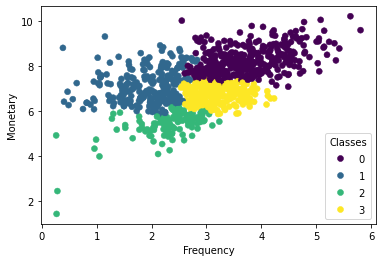

In [65]:
#plot the clusters and color by the labels
fig = plt.figure()
ax = plt.axes()
scatt = ax.scatter(rfm_0["Frequency"], rfm_0["Monetary"], c=cluster, cmap='viridis', 
                   linewidth=0.5, label = [0,1,2,3])
ax.legend(*scatt.legend_elements(),loc="lower right", title="Classes")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

In [66]:
#print frequency of each cluster
Counter(cluster)

Counter({2: 123, 3: 244, 0: 354, 1: 257})

In [67]:
#drop the added label field for the next model
rfm_0 = rfm_0.iloc[:,0:3]
rfm_0

,Frequency,Monetary,Recency
Merchant_Code,,,
1,2.959587,6.035314,0
2,3.290638,6.881052,0
3,3.848231,8.192756,0
4,1.232560,6.449570,0
5,2.567254,6.404418,0
...,...,...,...
996,2.250239,6.402995,0
997,2.099244,5.753303,0
998,2.765060,6.259390,0


### Gaussian Mixture Model (GMM)

In [68]:
#create an instance of kmeans model and train it
gmm_model = GaussianMixture(n_components=4, random_state=40)
cluster_labels_0 = gmm_model.fit_predict(rfm_0)


In [69]:
#create a list for the metrics scores for the model
gmm = [silhouette_score(rfm_0, cluster_labels_0), 
       metrics.calinski_harabasz_score(rfm_0, cluster_labels_0),
       davies_bouldin_score(rfm_0, cluster_labels_0)]
print("Silhouette score: ",gmm[0])
print("Calinski Harabasz Score: ",gmm[1])
print("Davies Bouldin Score: ",gmm[2])

Silhouette score:  0.33425176260874506
Calinski Harabasz Score:  716.0831610163069
Davies Bouldin Score:  0.9351276006688437


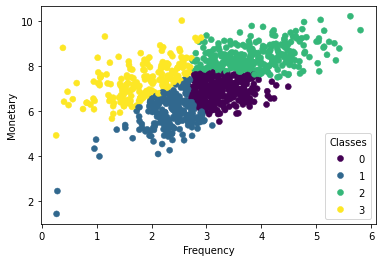

In [70]:
#plot the clusters and color by the labels
fig = plt.figure()
ax = plt.axes()
scatt = ax.scatter(rfm_0["Frequency"], rfm_0["Monetary"], c=cluster_labels_0 , 
                   cmap='viridis', linewidth=0.5, label = [0,1,2,3])
ax.legend(*scatt.legend_elements(),loc="lower right", title="Classes")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

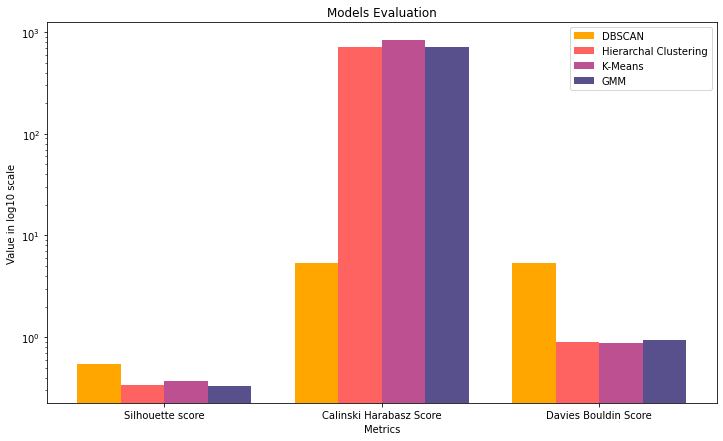

In [71]:
#compare between both models in all metrics
figure(num=None, figsize=(12, 7))

Labels=['Silhouette score', "Calinski Harabasz Score", 'Davies Bouldin Score']
y_pos=np.arange(len(Labels))
plt.bar(y_pos + 0, db,width=0.2, color = "#ffa600" , label='DBSCAN')
plt.bar(y_pos + 0.2, hier, width=0.2, color = '#ff6361', label = 'Hierarchal Clustering')
plt.bar(y_pos + 0.4, k,width=0.2, color ="#bc5090"  , label='K-Means')
plt.bar(y_pos + 0.6, gmm,width=0.2, color = '#58508d' , label='GMM')

plt.xticks(y_pos+0.3, Labels)
plt.yscale('log')
plt.legend(('DBSCAN','Hierarchal Clustering', 'K-Means', 'GMM'))
plt.ylabel('Value in log10 scale')
plt.xlabel('Metrics')
plt.title("Models Evaluation")
plt.show()

In [72]:
#update the data frame with the champion model's labels
rfm_0['Labels'] = modell_0.labels_
rfm_0

,Frequency,Monetary,Recency,Labels
Merchant_Code,,,,
1,2.959587,6.035314,0,2
2,3.290638,6.881052,0,3
3,3.848231,8.192756,0,1
4,1.232560,6.449570,0,0
5,2.567254,6.404418,0,2
...,...,...,...,...
996,2.250239,6.402995,0,2
997,2.099244,5.753303,0,2
998,2.765060,6.259390,0,2


In [73]:
#label encoding the clusters
rfm_0["Labels"] = rfm_0["Labels"].replace(0,"Needs Motivation")
rfm_0["Labels"] = rfm_0["Labels"].replace(1,"Loyal")
rfm_0["Labels"] = rfm_0["Labels"].replace(2,"Average")
rfm_0["Labels"] = rfm_0["Labels"].replace(3,"Potential Loyalist")

In [74]:
rfm_0

,Frequency,Monetary,Recency,Labels
Merchant_Code,,,,
1,2.959587,6.035314,0,Average
2,3.290638,6.881052,0,Potential Loyalist
3,3.848231,8.192756,0,Loyal
4,1.232560,6.449570,0,Needs Motivation
5,2.567254,6.404418,0,Average
...,...,...,...,...
996,2.250239,6.402995,0,Average
997,2.099244,5.753303,0,Average
998,2.765060,6.259390,0,Average


In [75]:
#print frequency of each cluster
rfm_0.Labels.value_counts()

Potential Loyalist    319
Loyal                 264
Average               207
Needs Motivation      188
Name: Labels, dtype: int64

In [76]:
#merge the dataframes to create a unified dataframe for all merchants
conc = rfm.join(rfm_0 ,rsuffix='_0')
conc = conc.drop(["Frequency_0","Monetary_0","Recency_0"], axis=1)
conc

,Frequency,Monetary,Recency,cluster,Labels
Merchant_Code,,,,,
1,2.959587,6.035314,0,0,Average
2,3.290638,6.881052,0,0,Potential Loyalist
3,3.848231,8.192756,0,0,Loyal
4,1.232560,6.449570,0,0,Needs Motivation
5,2.567254,6.404418,0,0,Average
...,...,...,...,...,...
996,2.250239,6.402995,0,0,Average
997,2.099244,5.753303,0,0,Average
998,2.765060,6.259390,0,0,Average


In [77]:
#adding the labels missing from first clustering phase
conc.Labels.fillna(conc.cluster, inplace=True)

In [78]:
#dropping the column holding labels from the first clustering phase
conc = conc.drop("cluster",axis=1)

In [79]:
concc = conc.copy()

In [80]:
concc

,Frequency,Monetary,Recency,Labels
Merchant_Code,,,,
1,2.959587,6.035314,0,Average
2,3.290638,6.881052,0,Potential Loyalist
3,3.848231,8.192756,0,Loyal
4,1.232560,6.449570,0,Needs Motivation
5,2.567254,6.404418,0,Average
...,...,...,...,...
996,2.250239,6.402995,0,Average
997,2.099244,5.753303,0,Average
998,2.765060,6.259390,0,Average


In [81]:
#the dictionary for "churned" merchants
d = {'Frequency': 0, 'Monetary': 0, 'Recency':-1, 'Labels':"Churned"}

In [82]:
# finding the CHURNED merchants (haven't made a trx. in this quarter) 
#and add them to the dataframe
ind = 0
for i in range(1,1001):
    if i not in concc.index :
        df2 = pd.DataFrame(d, index=[i])
        print(df2)
        concc = concc.append(df2)

     Frequency  Monetary  Recency   Labels
545          0         0       -1  Churned
     Frequency  Monetary  Recency   Labels
938          0         0       -1  Churned


In [83]:
#update the dataframe with the order of merchants
concc = concc.sort_index()
concc

,Frequency,Monetary,Recency,Labels
1,2.959587,6.035314,0,Average
2,3.290638,6.881052,0,Potential Loyalist
3,3.848231,8.192756,0,Loyal
4,1.232560,6.449570,0,Needs Motivation
5,2.567254,6.404418,0,Average
...,...,...,...,...
996,2.250239,6.402995,0,Average
997,2.099244,5.753303,0,Average
998,2.765060,6.259390,0,Average
999,2.851284,7.093155,0,Potential Loyalist


In [84]:
#print frequency of each cluster
concc.Labels.value_counts()

Potential Loyalist    319
Loyal                 264
Average               207
Needs Motivation      188
low risk               13
high risk               7
Churned                 2
Name: Labels, dtype: int64

In [85]:
#export the final dataframe to excel file
concc.to_excel("merchnats_rfm.xlsx")